In [146]:
# Read .pbm file

import cv2
import numpy as np
img = cv2.imread('Assignment_04_Grid_Map.png', cv2.IMREAD_GRAYSCALE)
colour_img = cv2.imread('Assignment_04_Grid_Map.png', cv2.IMREAD_COLOR)
# cv2.imshow('image', img)
# cv2.waitKey(3000)
# cv2.destroyAllWindows()

In [147]:
def sensor_model(pose, map):
    n_rays = 180
    angle_gap = 2

    max_range = 12
    measurements = {}

    directions = np.arange(-n_rays, n_rays+2, angle_gap)
    # print(directions)
    for direction in directions:
       
        # print("outer :", direction)
        ray_angle = pose[2] + direction * np.pi / 180
        x, y = pose[0], pose[1]
        step1 =0.04/(np.cos(ray_angle))
        step2 = 0.04/(np.sin(ray_angle))
        step = min(step1, step2)
        ray_occupancy_array = []

        for distance in np.arange(0, max_range, step):
            # print("inside", direction)
         
            x_endpoint_pixel = round((x + distance * np.cos(ray_angle))/0.04)
            y_endpoint_pixel = round((y + distance * np.sin(ray_angle))/0.04)
            ray_occupancy_array.append([x_endpoint_pixel, y_endpoint_pixel])
            if map[x_endpoint_pixel, y_endpoint_pixel] == 0:
                #print(direction)
                measurements[direction] = (distance, x_endpoint_pixel, y_endpoint_pixel, ray_occupancy_array)
                break
            # print(direction)
            measurements[direction] = (distance, x_endpoint_pixel, y_endpoint_pixel)
    return measurements




In [148]:

robot_pose = [4, 5.4, 1.57]
measurements = sensor_model(robot_pose, img)
print(len(measurements))
print(measurements)

45
{-88: (5.523212844375475, 238, 140, [[100, 135], [101, 135], [102, 135], [103, 135], [104, 135], [105, 135], [106, 135], [107, 135], [108, 135], [109, 135], [110, 135], [111, 135], [112, 135], [113, 135], [114, 135], [115, 136], [116, 136], [117, 136], [118, 136], [119, 136], [120, 136], [121, 136], [122, 136], [123, 136], [124, 136], [125, 136], [126, 136], [127, 136], [128, 136], [129, 136], [130, 136], [131, 136], [132, 136], [133, 136], [134, 136], [135, 136], [136, 136], [137, 136], [138, 136], [139, 136], [140, 136], [141, 136], [142, 136], [143, 136], [144, 137], [145, 137], [146, 137], [147, 137], [148, 137], [149, 137], [150, 137], [151, 137], [152, 137], [153, 137], [154, 137], [155, 137], [156, 137], [157, 137], [158, 137], [159, 137], [160, 137], [161, 137], [162, 137], [163, 137], [164, 137], [165, 137], [166, 137], [167, 137], [168, 137], [169, 137], [170, 137], [171, 137], [172, 137], [173, 137], [174, 138], [175, 138], [176, 138], [177, 138], [178, 138], [179, 138], 

In [149]:
# Using OpenCV to visualize the robot pose and the measurements in colour_img

cv2.circle(colour_img, (int(robot_pose[1]/0.04), int(robot_pose[0]/0.04)), 5, (0, 0, 255), -1)
for key in measurements:
    #cv2.line(colour_img, (int(robot_pose[1]/0.04), int(robot_pose[0]/0.04)), (measurements[key][2], measurements[key][1]), (0, 255, 0), 1)
    # Visualize all steps of the ray
    for step in measurements[key][3]:
        # cv2.circle(colour_img, (step[1], step[0]), 1, (255, 0, 0), -1)
        # Plot pixel instead of circle
        colour_img[step[0], step[1]] = (255, 0, 0)

cv2.imshow('image', colour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread

In [150]:
# TASK 4.2

In [151]:
## NOT OPTIMIZED
# def compute_nearest_occupied_cell(pos_pixel, map):
#     x = pos_pixel[0]
#     y = pos_pixel[1]

#     min_dist = np.inf
#     nearest_cell = None
#     # Find the nearest occupied cell
#     # Check if the current cell is occupied
#     # Brute Force search
#     for i in range(map.shape[0]):
#         for j in range(map.shape[1]):
#             if map[i, j] == 0:
#                 dist = np.sqrt((x-i)**2 + (y-j)**2)
#                 if dist < min_dist:
#                     min_dist = dist
#                     nearest_cell = (i, j)
#     return nearest_cell



In [152]:
def compute_nearest_occupied_cell(pos_pixel, map):
    x, y = pos_pixel
    occupied_indices = np.argwhere(map == 0)
    
    if len(occupied_indices) == 0:
        return None  # No occupied cells found
    
    dist = np.sqrt(np.sum((occupied_indices - np.array([x, y]))**2, axis=1))
    min_index = np.argmin(dist)
    
    nearest_cell = tuple(occupied_indices[min_index])
    
    return nearest_cell


In [153]:
# Testing the function'
print(robot_pose[0]/0.04, robot_pose[1]/0.04)
print(compute_nearest_occupied_cell((int(robot_pose[0]/0.04), int(robot_pose[1]/0.04)), img))



100.0 135.0
(86, 135)


In [154]:
import tqdm as tqdm
import os
# Compute the likelihood field
def likelihood_field(map):

    # If the map is already saved, load it
    if os.path.exists('likelihood_field.png'):
        return cv2.imread('likelihood_field.png', cv2.IMREAD_GRAYSCALE)
    
    # Initialize the likelihood field
    l = np.zeros(map.shape)
    # For each cell in the map - using tqdm to visualize the progress
    for i in tqdm.tqdm(range(len(l[:, 0]))):
        for j in range(len(l[0, :])):
            # If the cell is occupied
            closest_point = compute_nearest_occupied_cell((i, j), map)
            # Compute the distance to the nearest occupied cell
            dist = np.sqrt((i-closest_point[0])**2 + (j-closest_point[1])**2)
            # Compute the probability of the cell being occupied
            # Sigma = 0.35 
            l[i, j] = np.exp(-(dist*0.04)**2/(2*0.35**2))
    # Normalize the likelihood field to a range between 0 and 255
    l = l/np.max(l)*255
    return l

l = likelihood_field(img)
cv2.imshow('image', l)
cv2.waitKey(10000)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread (0x2d45930).
Cannot move to target thread (0x2d26de0)

QObject::moveToThread: Current thread (0x2d26de0) is not the object's thread

In [155]:
# Save the likelihood field map
cv2.imwrite('likelihood_field.png', l)
cv2.imwrite('likelihood_field.pbm', l)


True

In [156]:
reference_robot_pose = [4, 5.4, 1.57]
reference_measurement = sensor_model(reference_robot_pose, img)
print(reference_measurement)

{-88: (5.523212844375475, 238, 140, [[100, 135], [101, 135], [102, 135], [103, 135], [104, 135], [105, 135], [106, 135], [107, 135], [108, 135], [109, 135], [110, 135], [111, 135], [112, 135], [113, 135], [114, 135], [115, 136], [116, 136], [117, 136], [118, 136], [119, 136], [120, 136], [121, 136], [122, 136], [123, 136], [124, 136], [125, 136], [126, 136], [127, 136], [128, 136], [129, 136], [130, 136], [131, 136], [132, 136], [133, 136], [134, 136], [135, 136], [136, 136], [137, 136], [138, 136], [139, 136], [140, 136], [141, 136], [142, 136], [143, 136], [144, 137], [145, 137], [146, 137], [147, 137], [148, 137], [149, 137], [150, 137], [151, 137], [152, 137], [153, 137], [154, 137], [155, 137], [156, 137], [157, 137], [158, 137], [159, 137], [160, 137], [161, 137], [162, 137], [163, 137], [164, 137], [165, 137], [166, 137], [167, 137], [168, 137], [169, 137], [170, 137], [171, 137], [172, 137], [173, 137], [174, 138], [175, 138], [176, 138], [177, 138], [178, 138], [179, 138], [18

In [157]:
def transform_endpoints(measurements, new_pose):
    # Transform the endpoints of the rays to the new robot pose
    # new_pose = [x, y, theta]
    transformed_measurements = {}
    for relative_angle in measurements:
        distance = measurements[key][0]
        new_x_endpoint_pixel = new_pose[0] + distance*np.cos(new_pose[2] + relative_angle*np.pi/180)
        new_y_endpoint_pixel = new_pose[1] + distance*np.sin(new_pose[2] + relative_angle*np.pi/180)
        # transformed_measurements[key] = (distance, new_x_endpoint_pixel, new_y_endpoint_pixel)
        boundary_y = 640
        boundary_x = 400
        if 0 <= new_x_endpoint_pixel <= boundary_x and 0 <= new_y_endpoint_pixel <= boundary_y:
            transformed_measurements[key] = (distance, int(new_x_endpoint_pixel), int(new_y_endpoint_pixel))
        else:
            transformed_measurements[key] = (distance, None, None)
    return transformed_measurements


In [158]:
# Generate few random poses 
poses = []
for i in range(100):
    poses.append([np.random.randint(0, 400), np.random.randint(0, 680), np.random.randint(-180, 180) * np.pi/180])

# Compute Measurement Likelyhood for each pose
measurements_likelihood = [([int(reference_robot_pose[0]/0.04), int(reference_robot_pose[1]/0.04), reference_robot_pose[2]], 1)]
for pose in poses:
    measurements = transform_endpoints(reference_measurement, pose)
    # Calculate the likelihood of the measurements from the likelihood field
    probability = 1
    for key in measurements:
        if measurements[key][1] is not None:
            probability *= l[measurements[key][1], measurements[key][2]]/255
        else:
            probability *= 0.001
            
    measurements_likelihood.append((pose, probability))



In [159]:
print(measurements_likelihood)

[([100, 135, 1.57], 1), ([10, 271, -1.4660765716752369], 0.6588235294117647), ([292, 33, 0.13962634015954636], 1.0), ([229, 479, -2.9670597283903604], 0.0784313725490196), ([234, 247, 0.7330382858376184], 0.7843137254901961), ([302, 119, 1.605702911834783], 0.7254901960784313), ([68, 307, 1.0821041362364843], 0.09411764705882353), ([245, 495, -1.9547687622336491], 0.9490196078431372), ([300, 424, 0.9948376736367678], 0.9921568627450981), ([57, 384, -0.7330382858376184], 0.23137254901960785), ([227, 126, 0.03490658503988659], 0.7254901960784313), ([21, 113, 1.361356816555577], 0.09411764705882353), ([372, 142, 2.897246558310587], 0.5215686274509804), ([162, 450, -2.6354471705114375], 0.07450980392156863), ([273, 291, -2.775073510670984], 0.9921568627450981), ([346, 15, 1.6406094968746698], 0.2784313725490196), ([395, 592, 2.9670597283903604], 0.792156862745098), ([153, 488, 2.8099800957108703], 0.09411764705882353), ([156, 324, 1.7976891295541593], 0.0), ([18, 593, -0.5061454830783556],

(400, 680, 3)


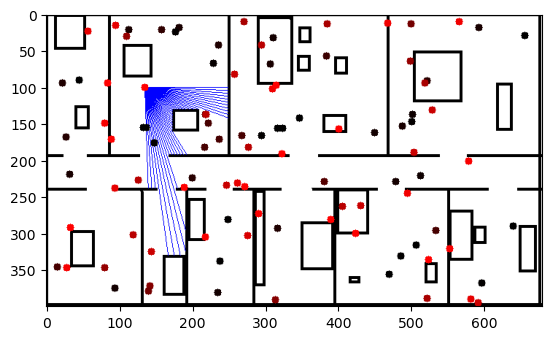

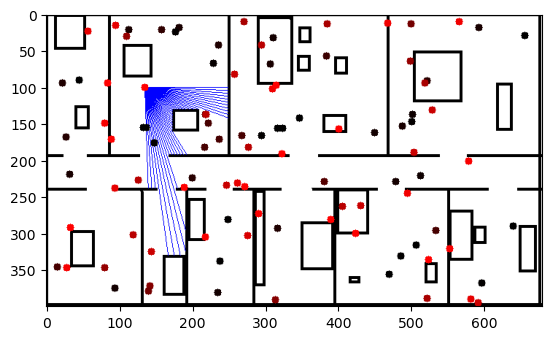

In [160]:
# Plot measurement likelihood for each pose in colour_img
import matplotlib.pyplot as plt
# Convert the color_img to RGB format
cv2_image = cv2.cvtColor(colour_img, cv2.COLOR_BGR2RGB)
# Print the image shape
print(cv2_image.shape)
# Iterate through measurements_likelihood to add poses and probabilities to the image
for pose, probability in measurements_likelihood:
    # Convert pose to integers and modify the image to add the pose and the probability 
    # cv2_image[int(pose[0]), int(pose[1])] = (int(255 * probability), 0, 0)
    # Add a circle to the image to visualize the robot pose
    cv2.circle(cv2_image, (int(pose[1]), int(pose[0])), 5, (int(255 * probability), 0, 0), -1)

# Display the modified image
plt.imshow(cv2_image)
plt.show()
plt.imshow(cv2_image)
plt.show()

    